In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
inpath = %pwd
infile = inpath +'/sunspot_data.csv'
df = pd.read_csv(infile)
df.drop(['Date In Fraction Of Year','Observations','Indicator'],axis=1,inplace=True)
df = df[df['Number of Sunspots'] >= 0]
df['Sunspot Number Error'] = df['Standard Deviation']/np.sqrt(df['Number of Sunspots'])
df.replace([np.inf,-np.inf],0,inplace=True)
df.fillna(0,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70471 entries, 7 to 73717
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            70471 non-null  int64  
 1   Year                  70471 non-null  int64  
 2   Month                 70471 non-null  int64  
 3   Day                   70471 non-null  int64  
 4   Number of Sunspots    70471 non-null  int64  
 5   Standard Deviation    70471 non-null  float64
 6   Sunspot Number Error  70471 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 4.3 MB


In [4]:
df.corr()

,Unnamed: 0,Year,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
Unnamed: 0,1.000000,0.999987,0.003660,0.003773,0.064322,-0.292982,-0.337769
Year,0.999987,1.000000,-0.001386,0.003305,0.064302,-0.293004,-0.337826
Month,0.003660,-0.001386,1.000000,0.008554,0.003905,0.003890,0.010407
Day,0.003773,0.003305,0.008554,1.000000,-0.000028,-0.002414,0.002131
Number of Sunspots,0.064322,0.064302,0.003905,-0.000028,1.000000,0.831973,0.372759
Standard Deviation,-0.292982,-0.293004,0.003890,-0.002414,0.831973,1.000000,0.706696
Sunspot Number Error,-0.337769,-0.337826,0.010407,0.002131,0.372759,0.706696,1.000000


# Innvestigate Data Correlations

### Matplotlib

<IPython.core.display.Javascript object>


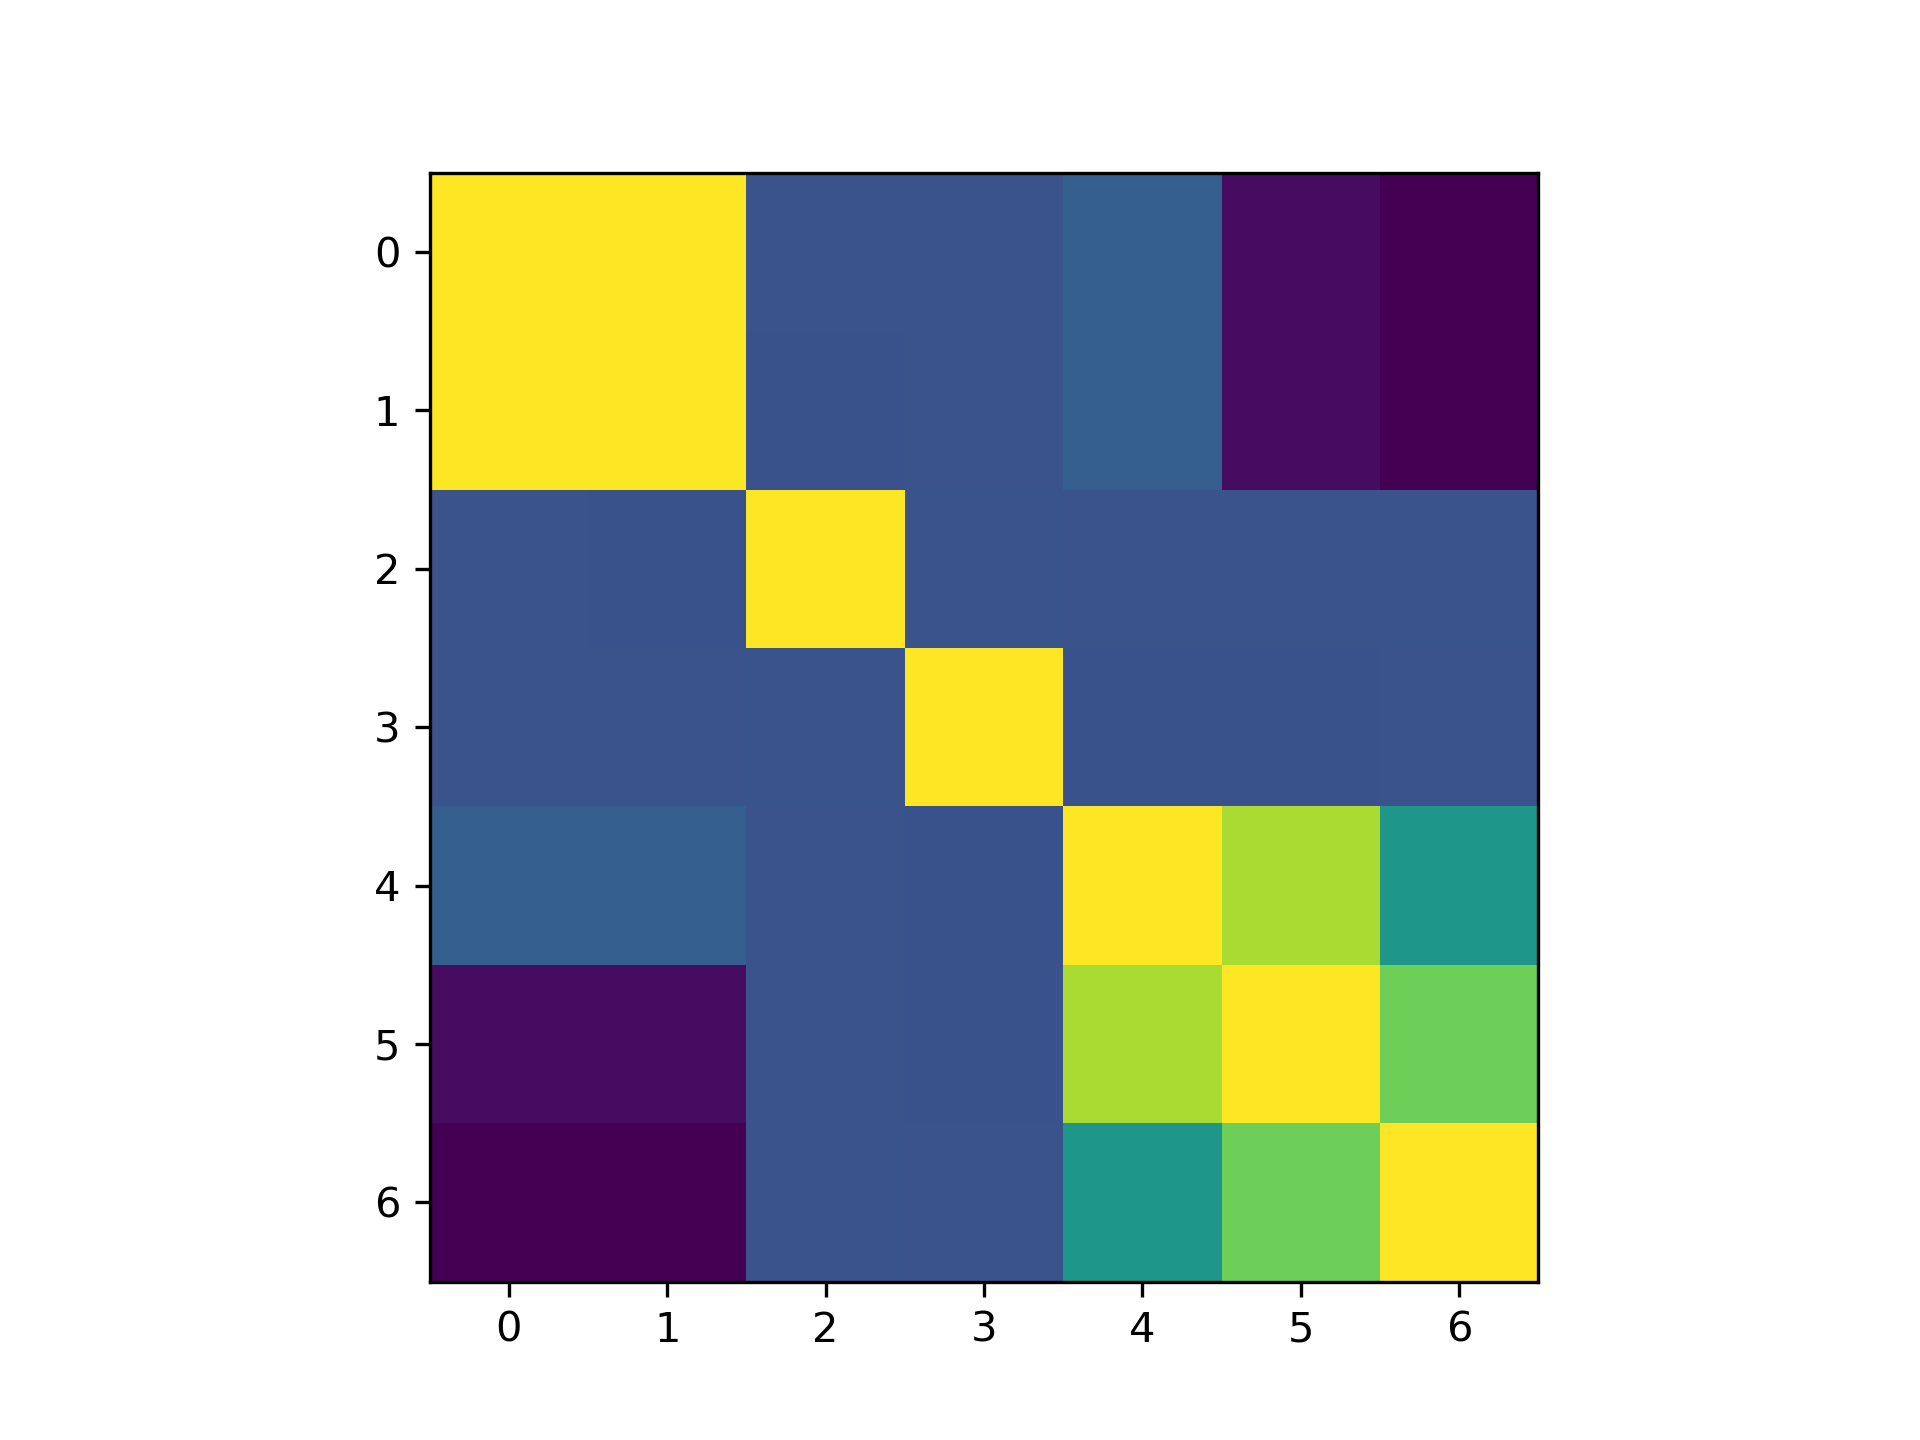

In [5]:
fig = plt.figure()
plt.imshow(df.corr())

### Seaborn (build on Matplotlib)

<IPython.core.display.Javascript object>


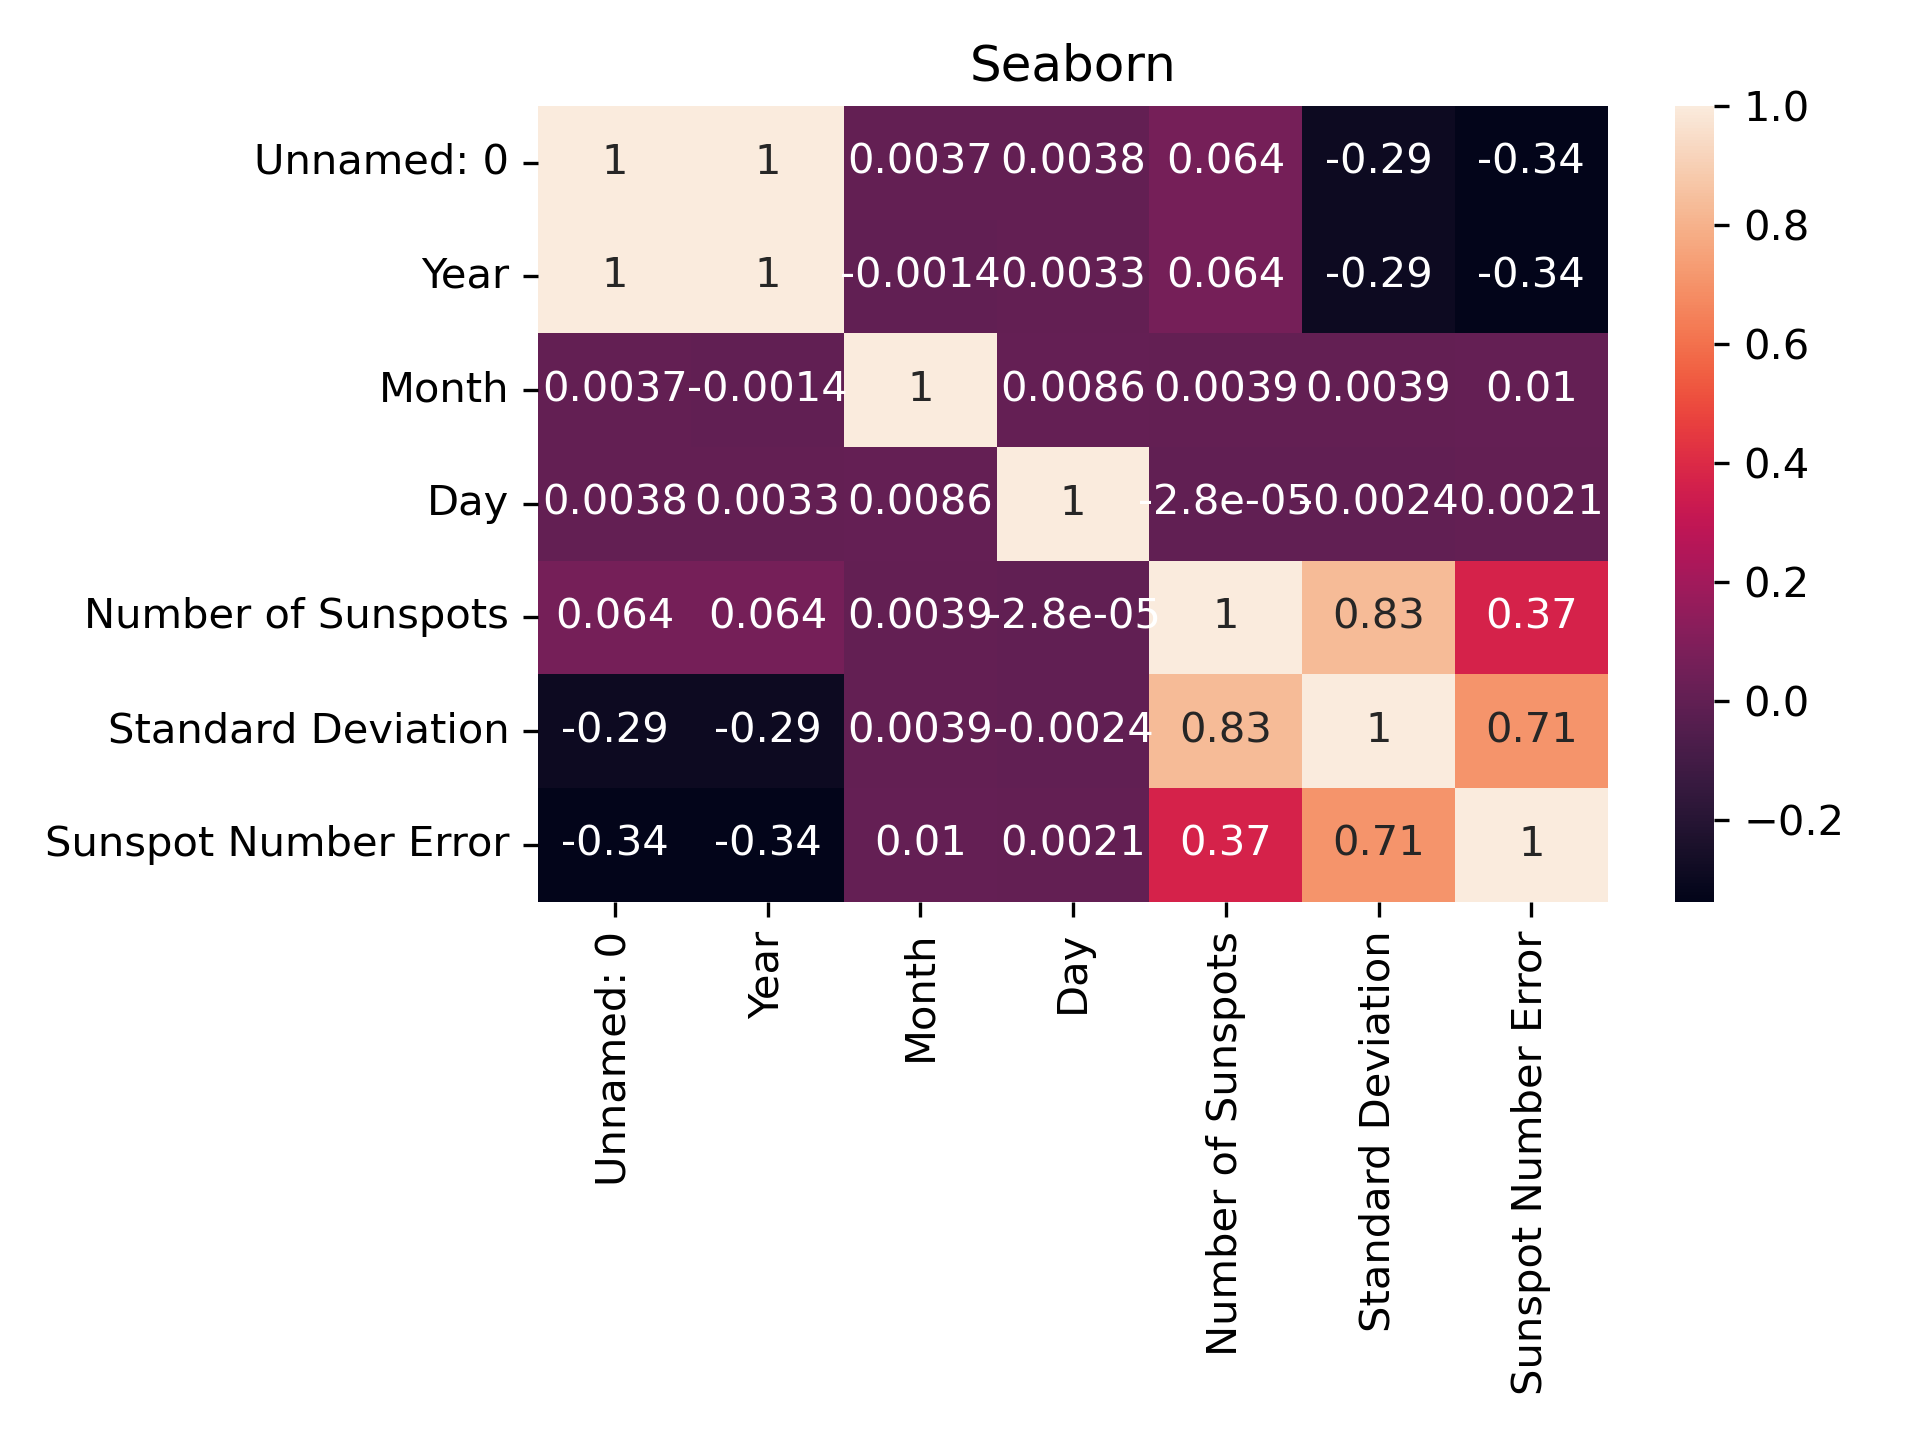

In [6]:
import seaborn as sns
fig = plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.title('Seaborn')
plt.tight_layout();

# Histograming the data

<IPython.core.display.Javascript object>


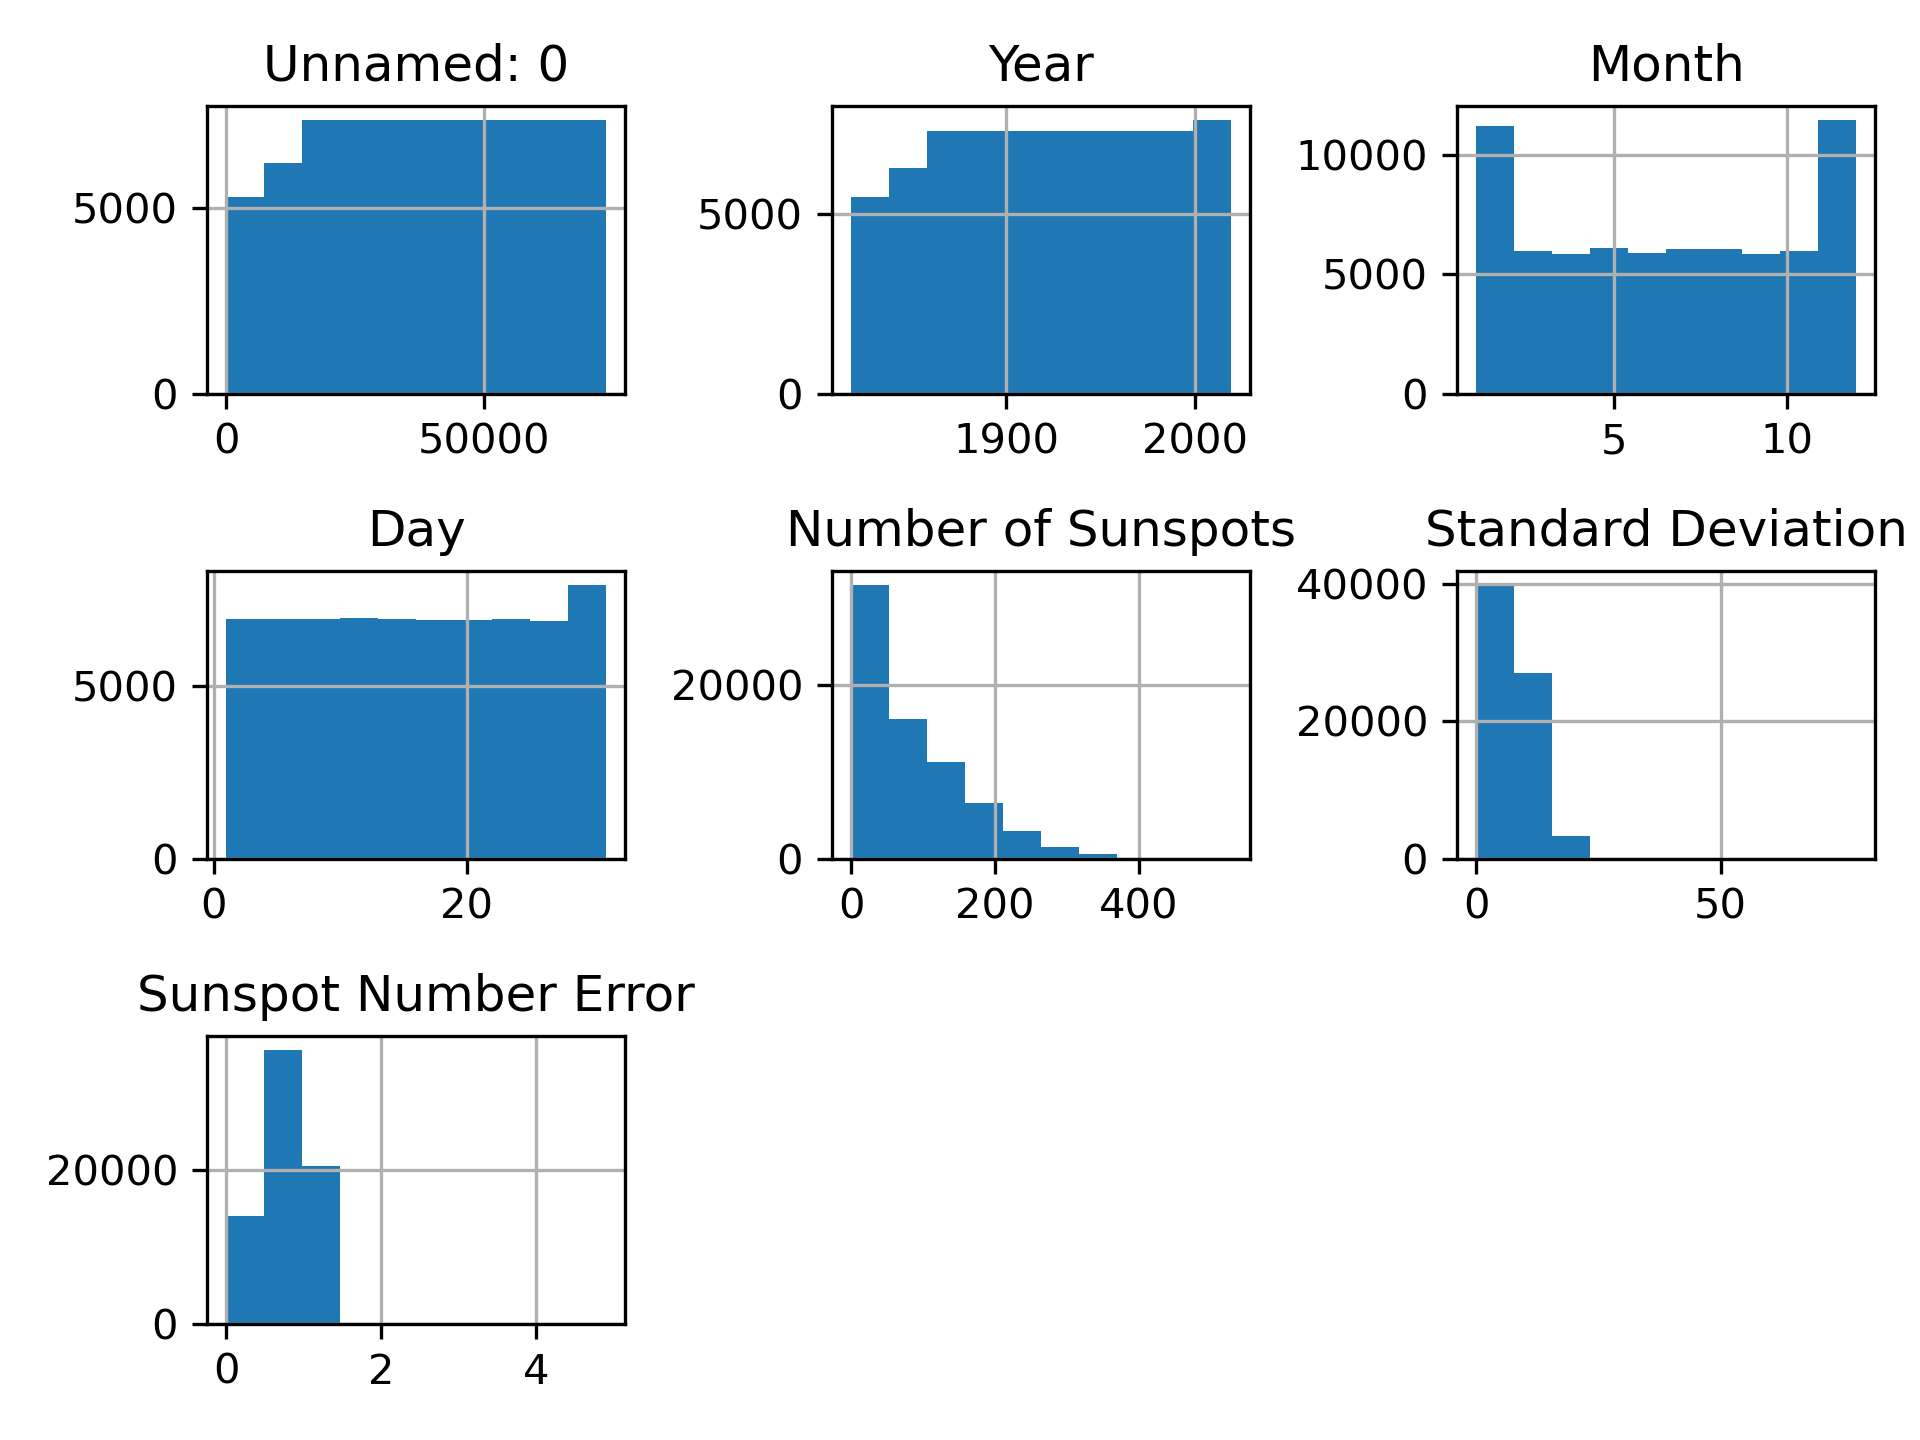

In [7]:
ax = df.hist()
plt.title('Dataframe')
plt.tight_layout();

<IPython.core.display.Javascript object>


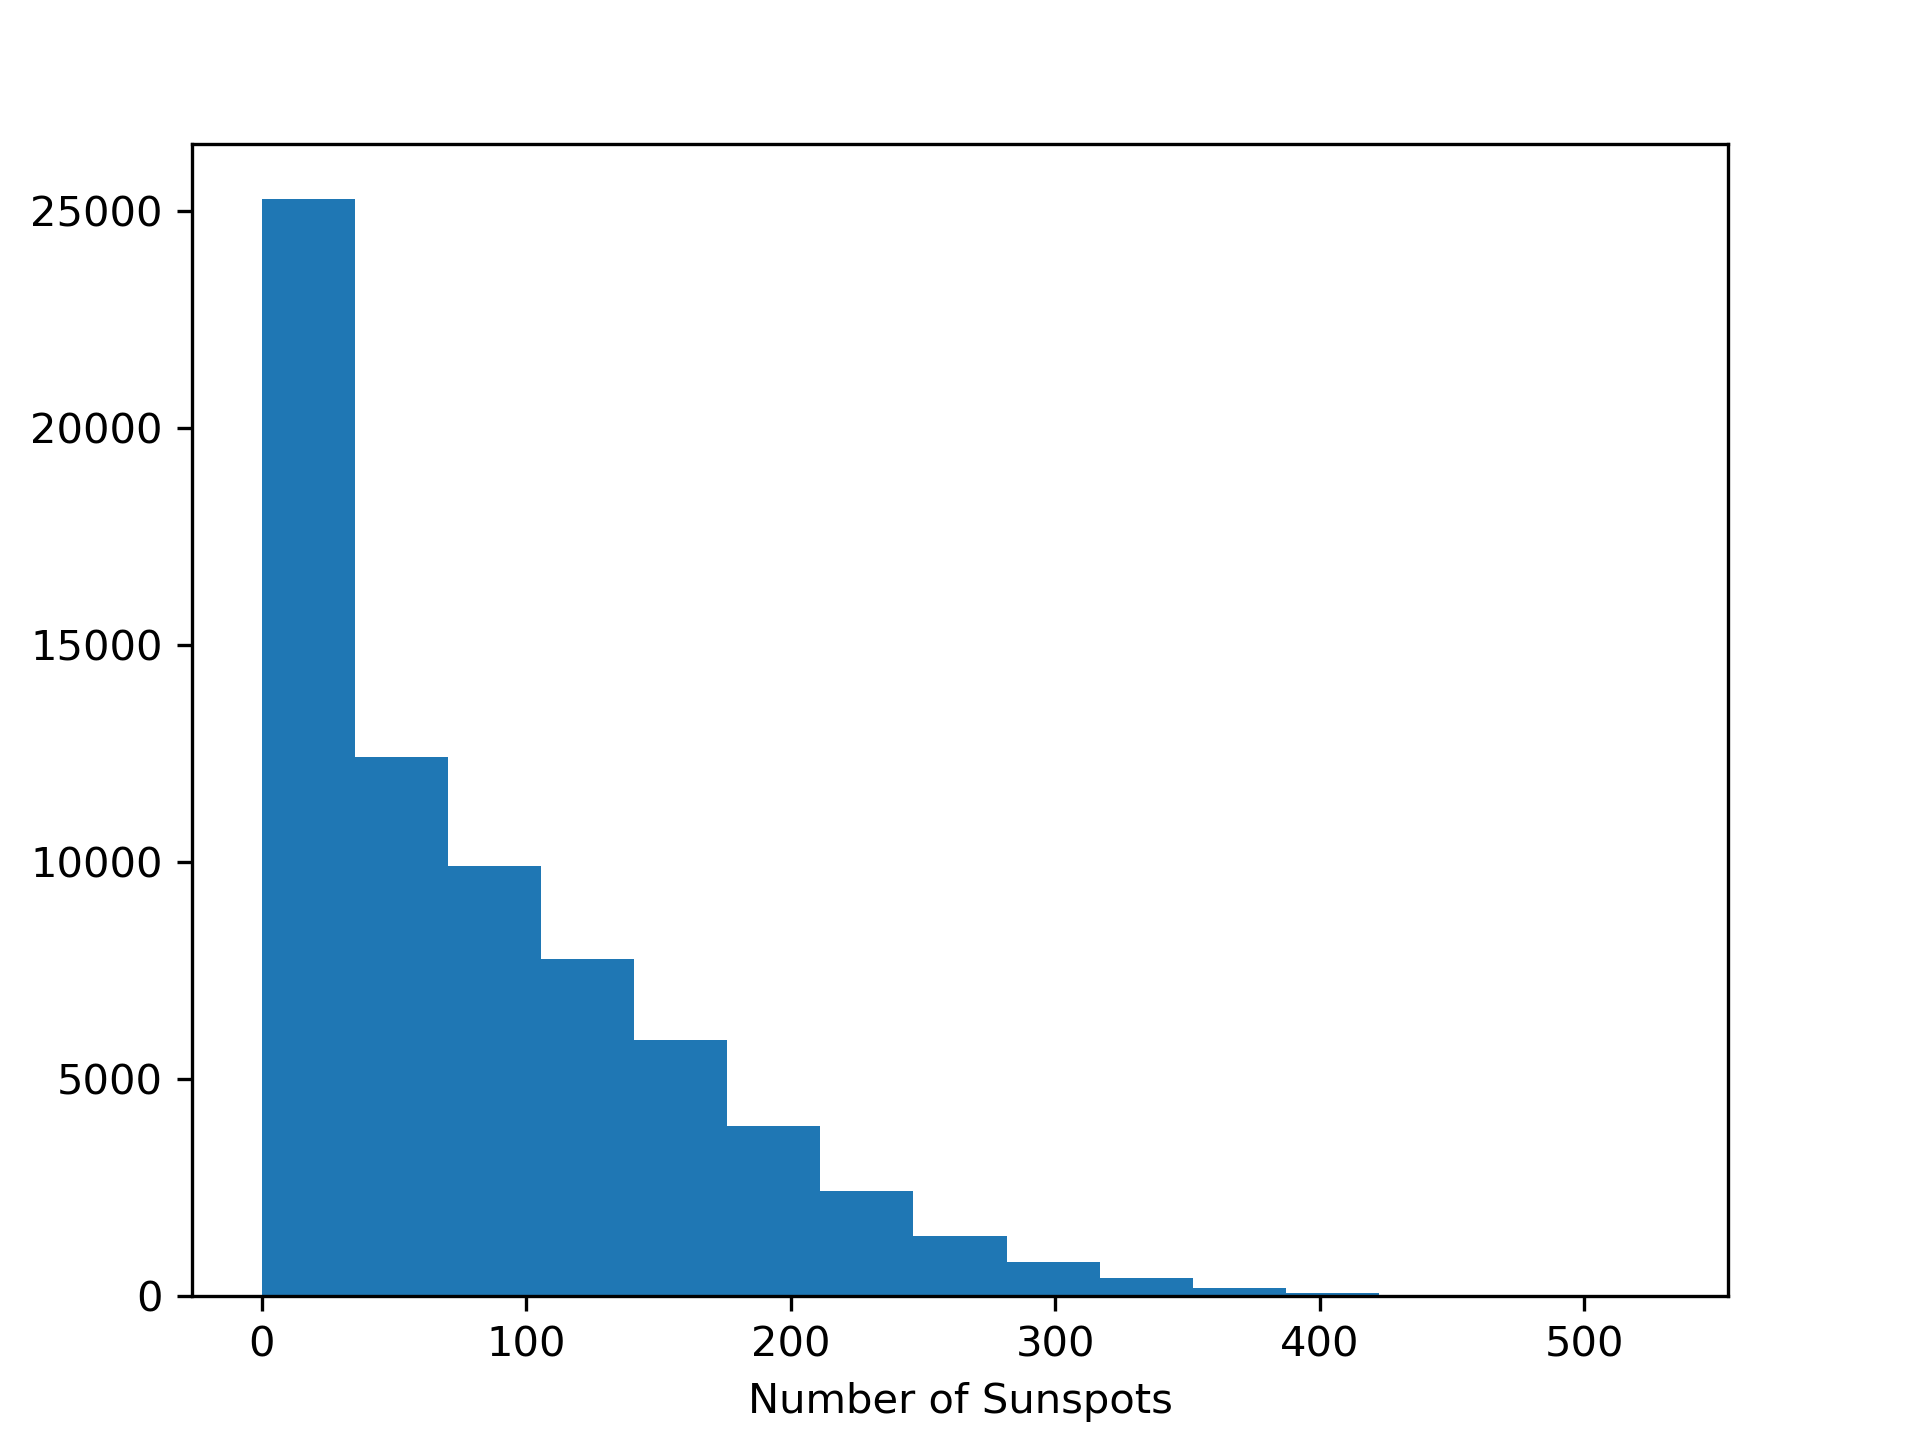

In [8]:
fig = plt.figure('Number of Sunspots')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw x and v
ax.hist(df['Number of Sunspots'], bins=15)
ax.set_xlabel('Number of Sunspots')
ax.grid(0);

### We can reset the index so that it again starts from 0

In [9]:
df

,Unnamed: 0,Year,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
7,7,1818,1,8,65,10.2,1.265154
12,12,1818,1,13,37,7.7,1.265872
16,16,1818,1,17,77,11.1,1.264962
17,17,1818,1,18,98,12.6,1.272792
18,18,1818,1,19,105,13.0,1.268670
...,...,...,...,...,...,...,...
73713,73713,2019,10,27,0,0.0,0.000000
73714,73714,2019,10,28,0,0.0,0.000000
73715,73715,2019,10,29,0,0.0,0.000000
73716,73716,2019,10,30,0,0.0,0.000000


In [10]:
df.reset_index(inplace=True)
df.tail(10)

,index,Unnamed: 0,Year,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
70461,73708,73708,2019,10,22,0,0.0,0.0
70462,73709,73709,2019,10,23,0,0.0,0.0
70463,73710,73710,2019,10,24,0,0.0,0.0
70464,73711,73711,2019,10,25,0,0.0,0.0
70465,73712,73712,2019,10,26,0,0.0,0.0
70466,73713,73713,2019,10,27,0,0.0,0.0
70467,73714,73714,2019,10,28,0,0.0,0.0
70468,73715,73715,2019,10,29,0,0.0,0.0
70469,73716,73716,2019,10,30,0,0.0,0.0
70470,73717,73717,2019,10,31,0,0.0,0.0


In [40]:
test = df['Year'].value_counts()
print(test)

1916    366
1960    366
1996    366
1880    366
1968    366
       ... 
1824    194
1839    194
1835    173
1836    166
1837    150
Name: Year, Length: 202, dtype: int64


In [112]:
df_year = df.groupby('Year').sum()
#df_year['Number of Sunspots']
#df_year.reindex(labels=df['Year'])
#print(df_year['Number of Sunspots'])
print(df_year.iloc[0])

index                   39473.000000
Unnamed: 0              39473.000000
Month                    1414.000000
Day                      3350.000000
Number of Sunspots      11276.000000
Standard Deviation       1843.400000
Sunspot Number Error      251.881534
Name: 1818, dtype: float64


In [98]:
my_year = np.zeros(len(df_year))
my_spots = np.zeros(len(df_year))

for i in range (len(df_year)):
    my_spots[i] = df_year['Number of Sunspots'].iloc[i]
    #print(my_spots[i])

In [15]:
df.groupby('Year').sum().head(20)

,index,Unnamed: 0,Month,Day,Number of Sunspots,Standard Deviation,Sunspot Number Error
Year,,,,,,,
1818,39473,39473,1414,3350,11276,1843.4,251.881534
1819,138210,138210,1695,3818,9595,1772.7,237.864218
1820,203952,203952,1447,3449,5428,1212.2,156.685652
1821,392887,392887,2130,4724,2791,1038.9,102.353100
1822,580475,580475,2320,5542,2208,1035.7,73.341106
1823,601825,601825,1820,4742,658,708.3,25.347246
1824,466744,466744,1469,3104,2218,702.1,67.158826
1825,846984,846984,1959,4722,8748,1838.2,262.105624
1826,992467,992467,2065,4941,19165,2926.1,367.318282


<IPython.core.display.Javascript object>


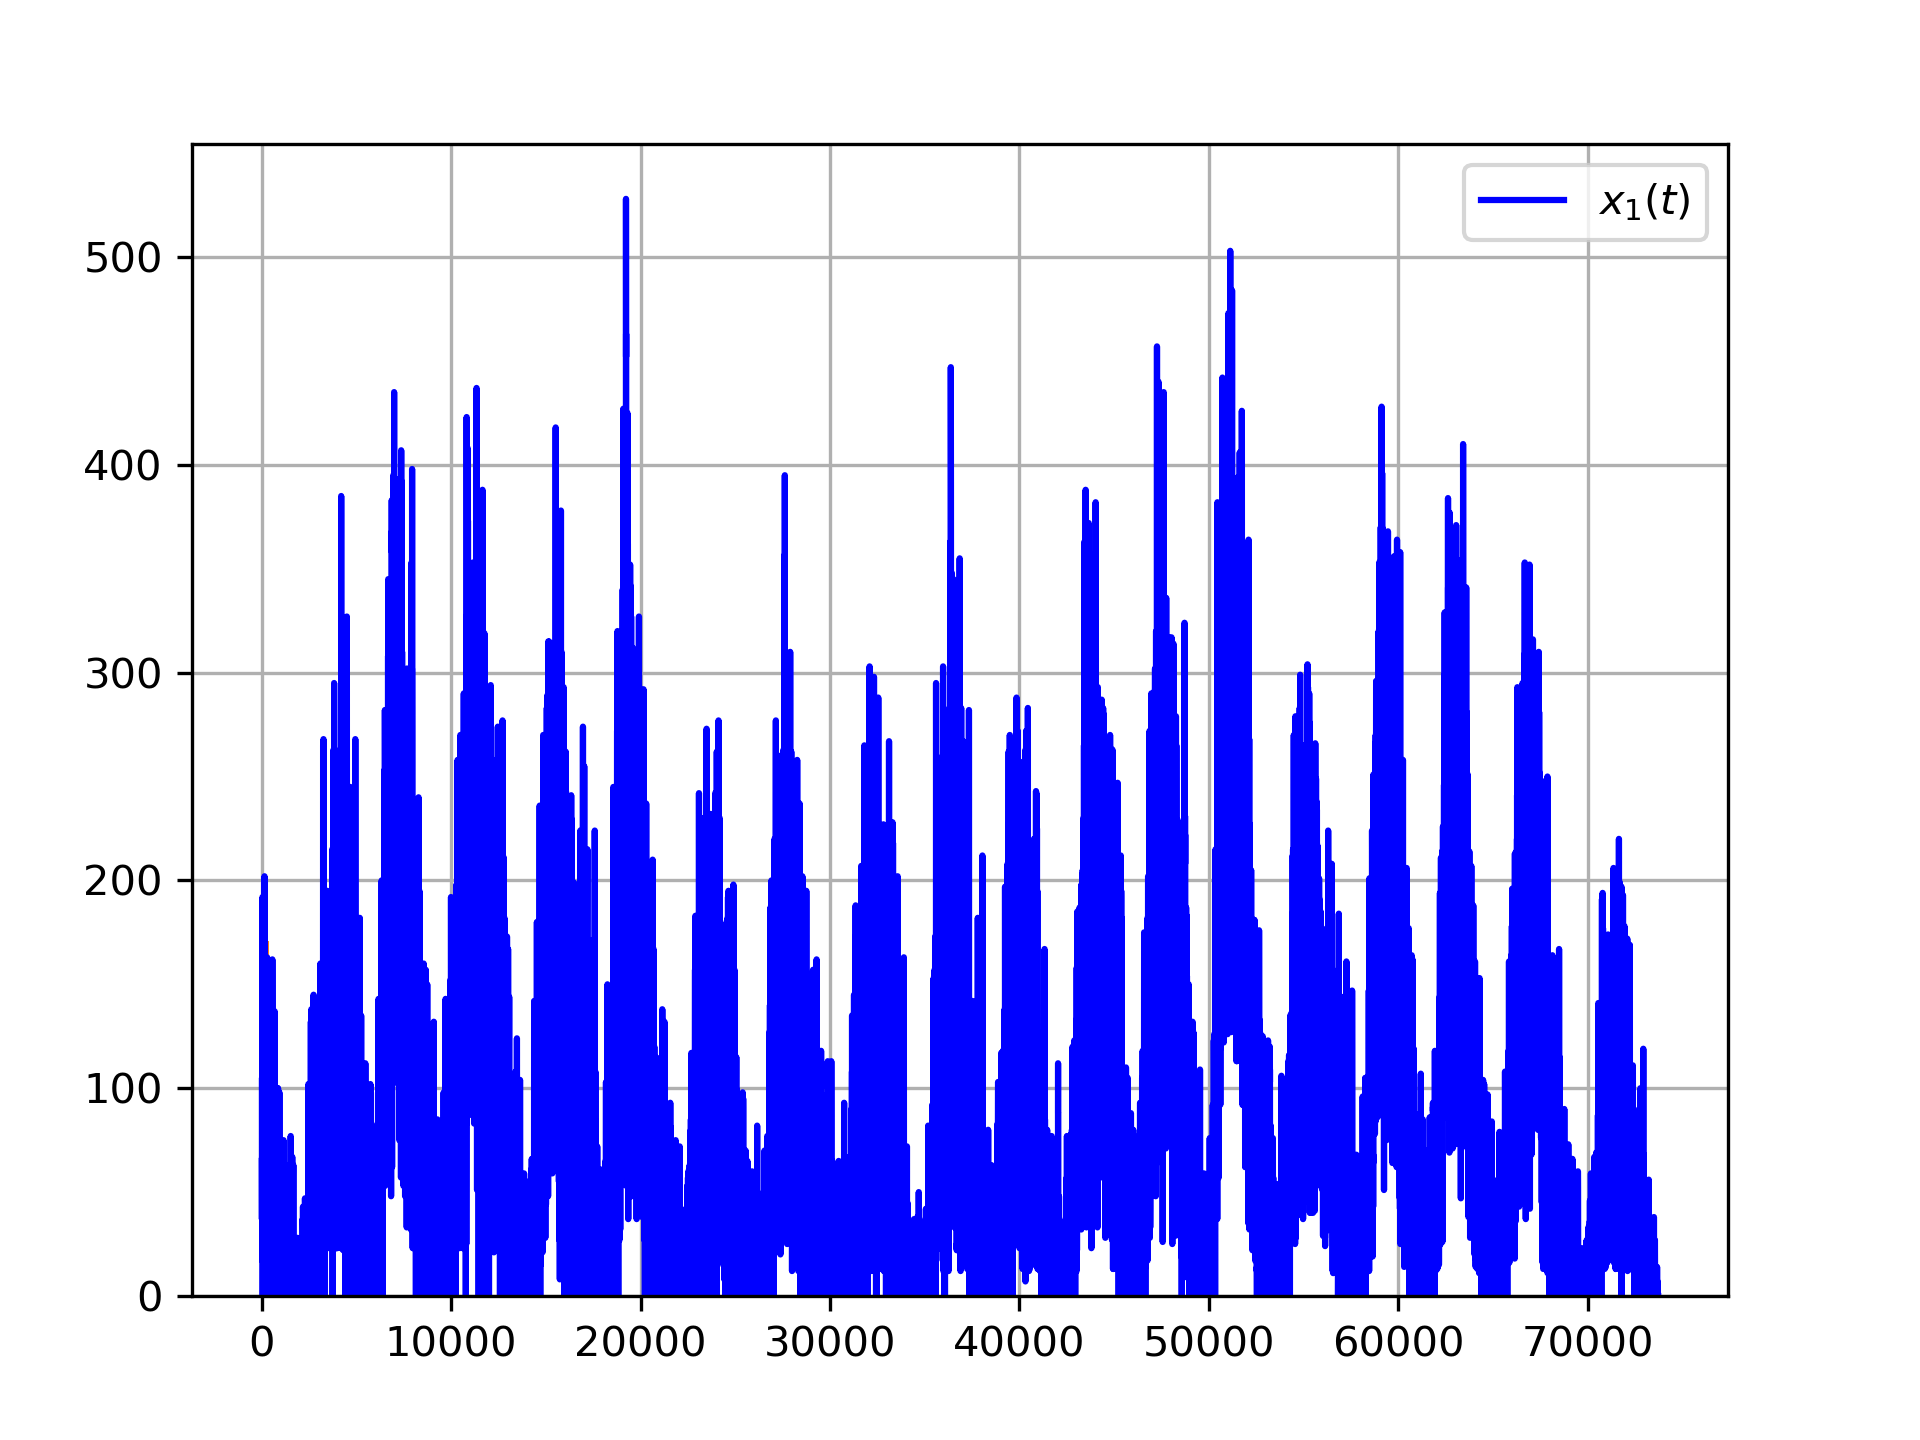

In [12]:
fig = plt.figure('Sunspots vs. Time')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw x and v
ax.plot(df['index'],df['Number of Sunspots'],'b', label=r'$x_1(t)$')

ax.legend()
ax.grid();